
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad_data= pd.read_csv("advertising.csv")

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.describe()
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


** Create a histogram of the Age**

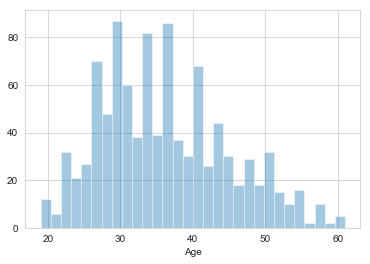

In [9]:
sns.set_style("whitegrid")
sns.distplot(ad_data["Age"],kde=False,bins=30)

**Create a jointplot showing Area Income versus Age.**

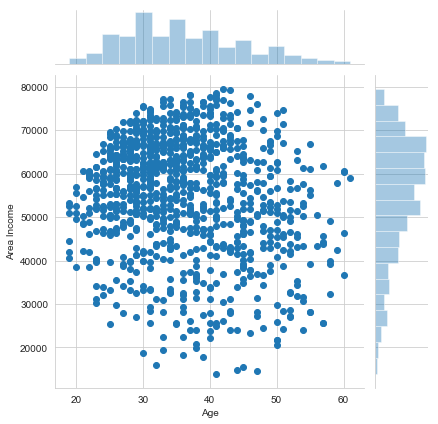

In [10]:
sns.jointplot(x="Age",y="Area Income",data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

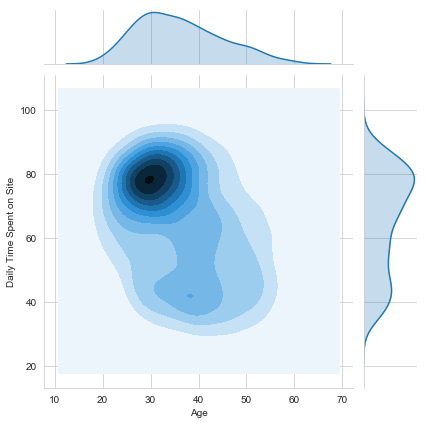

In [11]:
sns.jointplot(x="Age",y="Daily Time Spent on Site",data=ad_data,kind="kde")

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

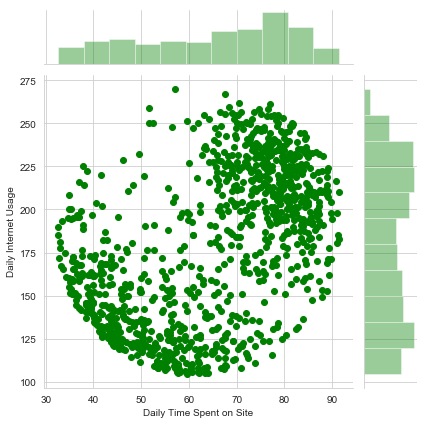

In [12]:
sns.jointplot(x="Daily Time Spent on Site",y="Daily Internet Usage",data=ad_data,color="green")

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

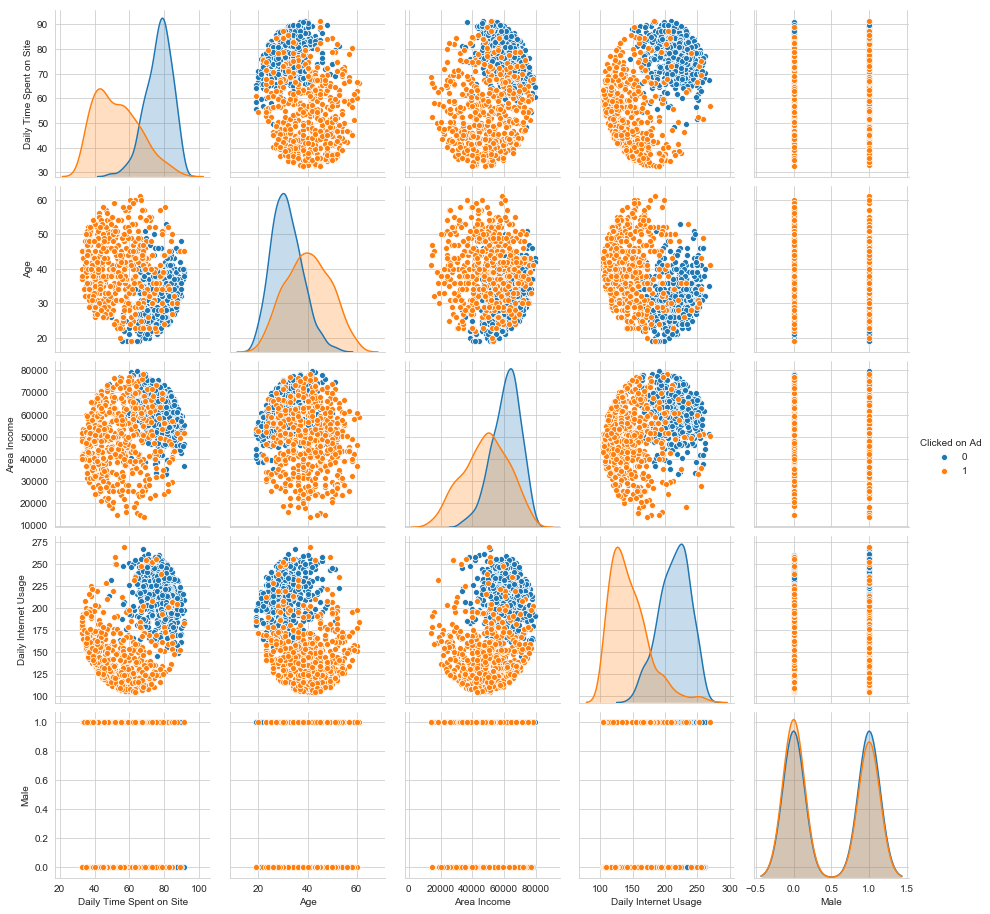

In [13]:
sns.pairplot(data=ad_data,hue='Clicked on Ad')

** Split the data into training set and testing set**

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X= ad_data[["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Male"]]
y=ad_data["Clicked on Ad"]

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
logReg= LogisticRegression()

In [26]:
logReg.fit(X_train,y_train)

C:\Users\hamed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [27]:
predictions=logReg.predict(X_test)

** Create a classification report for the model.**

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

